In [ ]:
!pip install transitions
import transitions

from transitions import Machine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.7/96.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 3.5 MB/s eta 0:00:00


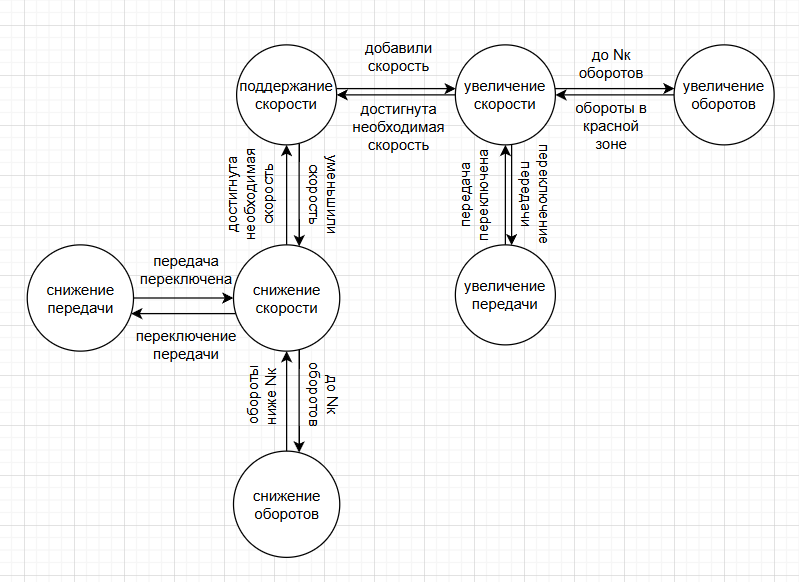

In [ ]:
# создаем класс объекта
# инициализируем объект класса
# создаем список состояний
# создаем список переходов
# инициализируем машину

class Matter:
  pass

cruise_control = Matter()

states = [
    'maintaining_speed',
    'increasing_speed',
    'increasing_RPM',
    'increasing_gear',
    'lower_speed',
    'lower_RPM',
    'lower_gear'
]

transitions = [
    { 'trigger': 'increase_speed', 'source': 'maintaining_speed', 'dest': 'increasing_speed' },
    { 'trigger': 'speed_reached', 'source': 'increasing_speed', 'dest': 'maintaining_speed' },

    { 'trigger': 'increase_rpm', 'source': 'increasing_speed', 'dest': 'increasing_RPM' },
    { 'trigger': 'rpm_redzone', 'source': 'increasing_RPM', 'dest': 'increasing_speed' },

    { 'trigger': 'increase_gear', 'source': 'increasing_speed', 'dest': 'increasing_gear' },
    { 'trigger': 'gear_switched', 'source': 'increasing_gear', 'dest': 'increasing_speed' },

    { 'trigger': 'decrease_speed', 'source': 'maintaining_speed', 'dest': 'lower_speed' },
    { 'trigger': 'speed_reached', 'source': 'lower_speed', 'dest': 'maintaining_speed' },

    { 'trigger': 'decrease_rpm', 'source': 'lower_speed', 'dest': 'lower_RPM' },
    { 'trigger': 'rpm_below_nk', 'source': 'lower_RPM', 'dest': 'lower_speed' },

    { 'trigger': 'decrease_gear', 'source': 'lower_speed', 'dest': 'lower_gear' },
    { 'trigger': 'gear_switched', 'source': 'lower_gear', 'dest': 'lower_speed' },
]

machine = Machine(cruise_control, states=states, transitions=transitions, initial='maintaining_speed')


In [ ]:
cruise_control.state

'maintaining_speed'

In [ ]:
cruise_control.trigger('increase_speed')

True

In [ ]:
cruise_control.state

'increasing_speed'

In [ ]:
cruise_control.trigger('increase_rpm')
cruise_control.state

'increasing_RPM'